## <center> 4. Data Analysis and Visualization



**<center> 4.1. Plotting with pandas**


Pandas is not a data visualization library by any stretch of the imagination. However, it does have built-in functionality to make use of Matplotlib on the fly. This is especially useful when performing exploratory data analysis, and you want a quick visual representation of your data. As a general rule, if you're presenting your findings with non-technical audiences, there are better options for crafting your visuals. 

To start us off, we're going to create a time series data frame with two randomly-generated values per period. There you go. Now, it couldn't be simpler for us to visualize this data in Pandas. Simply call plot. 

In [1]:
import pandas as pd

# Note may need to call %matplotlib inline to display visuals inline

In [2]:
import numpy as np
daterange = pd.period_range('1/1/1950', freq='1d', periods=50)
date_df = pd.DataFrame(data=daterange,columns=['day'])
date_df['value1'] = np.random.randint(45,65,size=(len(date_df)))
date_df['value2'] = np.random.randint(25,35,size=(len(date_df)))
date_df.head(3)

,day,value1,value2
0,1950-01-01,58,25
1,1950-01-02,55,29
2,1950-01-03,45,31


Now, we see a graph with two lines spanning the 50 periods in our dataset. An auto-generated legend has been placed on our visual as well. Notice the use of the semi-colon at the end of our function. This is included to prevent messy code output from being printed out along with our graph. 

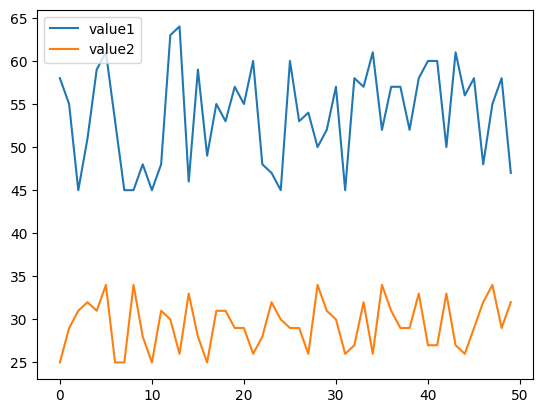

In [3]:
ax = date_df.plot();

Now, let's review a few more options for visuals. Here, we'll generate an area graph which is similar to our line chart above, but it's filled. Note, we passed stacked equals false, but a stacked area vis is an option as well. Now, you can see our lines have actually been stacked one upon the other. 

<Axes: >

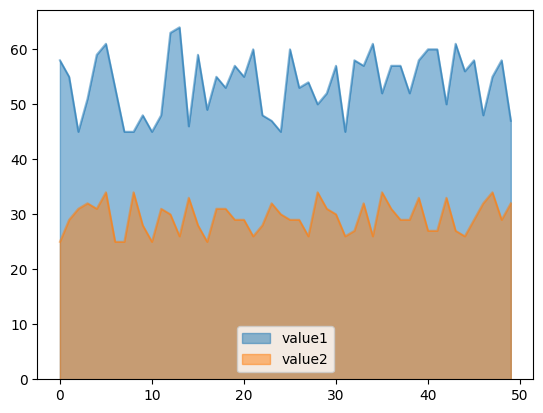

In [4]:
date_df.plot.area(stacked=False)

<Axes: >

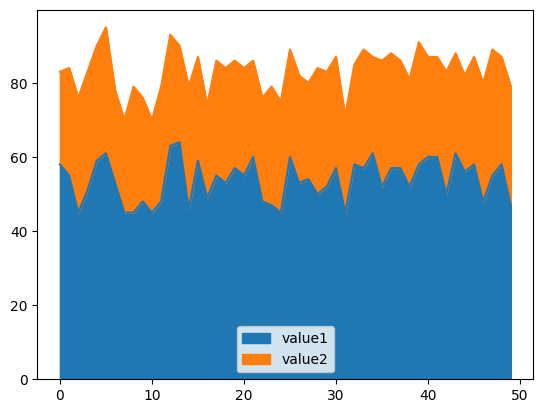

In [5]:
date_df.plot.area(stacked=True)

Next, let's import the iris dataset. We can see histograms for our dataset very simply by calling .hist on our data frame. Here, the output shows a histogram for each variable in the iris dataset. This is the type of visual that can really speed along your process by calling out trends in a clean visual manner. 

In [6]:
iris=pd.read_csv('iris.csv')

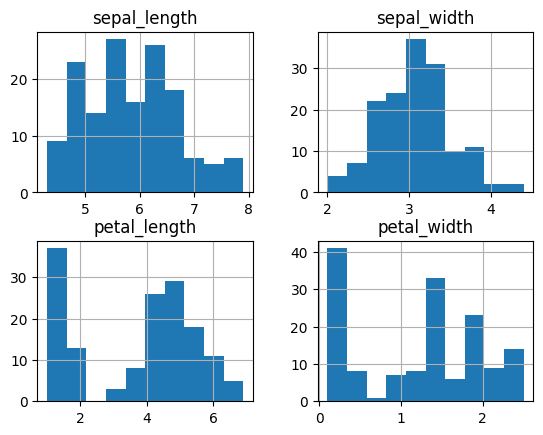

In [7]:
iris.hist();

Now, by instead calling plot.hist, we can overlay the histograms of our variables on the same axis. Note, when you overlay visuals, you'll want to increase the transparency by altering the alpha parameter. Here, alpha is set to 0.5. 

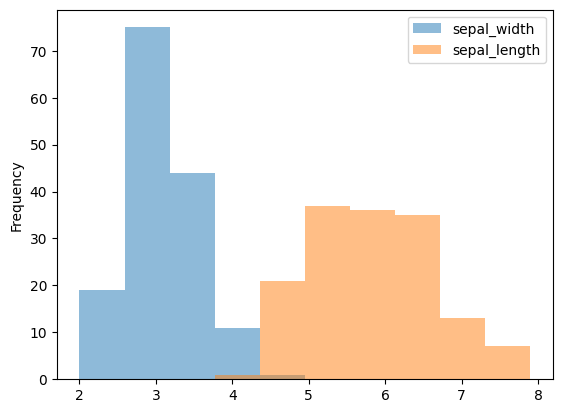

In [9]:
iris[['sepal_width', 'sepal_length']].plot.hist(alpha=0.5);

The next visualization we'll generate is a scatter plot. We'll designate sepal width for the x-axis and sepal length for the y-axis. We can then plot each iris observation and assign a color corresponding to the species. Notice here, we use .map to translate each species to a color for our plot. This is another insightful visual. We see pretty definitive clusters forming between our three species. 

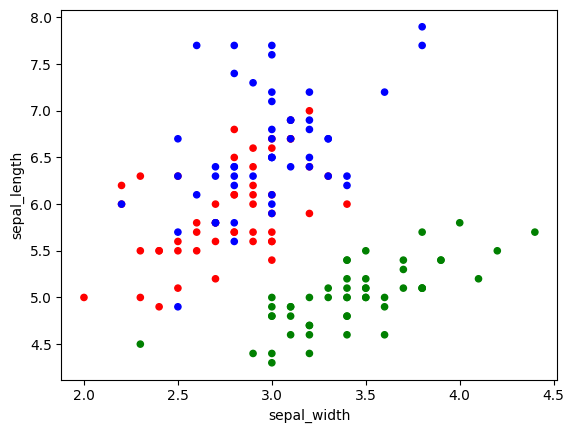

In [10]:
# scatter plot
colors = {"versicolor":"red","setosa":"green","virginica":"blue"}
iris['colors'] = iris['species'].map(colors)
iris.plot.scatter(x='sepal_width', y='sepal_length', color=iris['colors']);


The last plot type for us to review is called the scatter matrix. It will generate scatter plots showing the relationship between each of your variables, and along the diagonal, you will see histograms showing how your observations are distributed. Notice the figsize in our scatter matrix. This parameter allows you to better fit your visuals to the space available on your screen. 

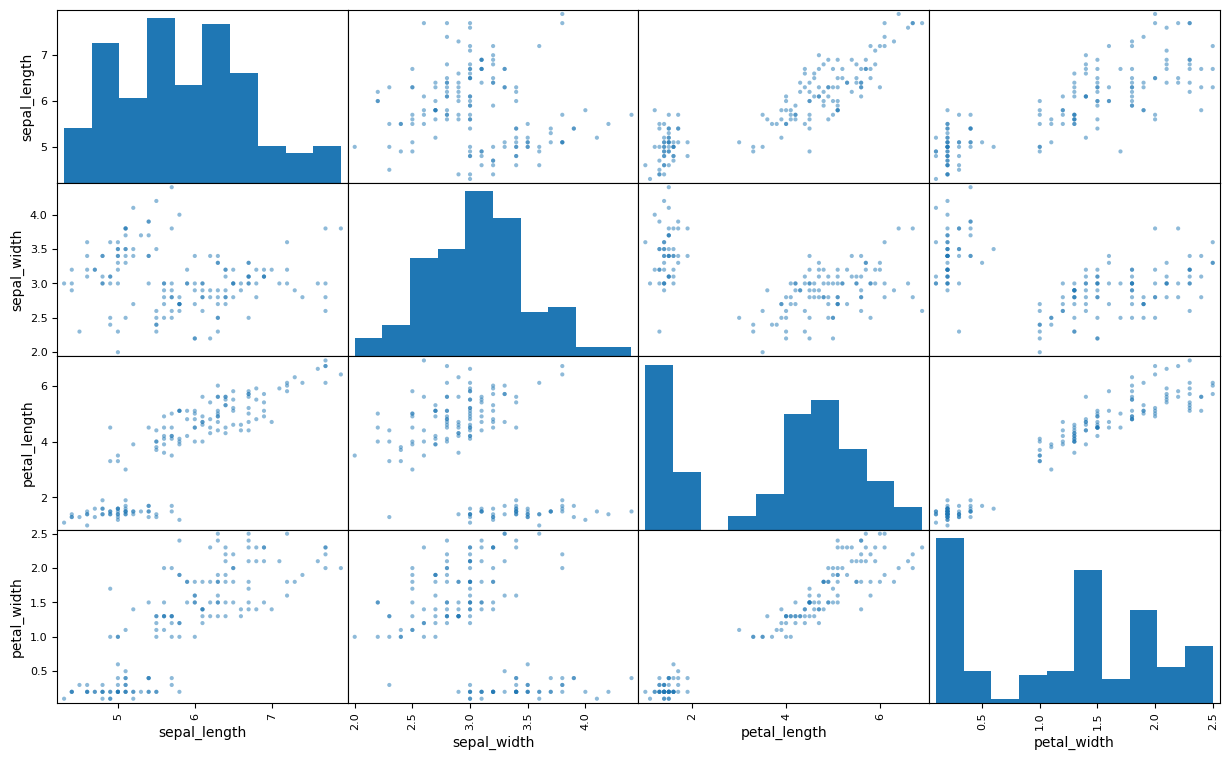

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, figsize=(15,9), );

Reviewing our visual, we can see that petal length and petal width have a very strong positive correlation. This histogram is simply showing the distribution of observations for petal width. Overall, this is a very nice visual to get a very quick understanding of your data. While Pandas' visuals may not be the snazziest you'll find, their simplicity and ease of use are hard to beat when you need insights on the fly. Next time you're performing exploratory data analysis, try some of these features out.

**<center>4.2. Correlations and statistical functions**

Long before machine learning and AI became the buzzwords of the century, the humble discipline of statistics established the foundation for drawing inference and insight from our data. 

With pandas, you have several statistical functions right at your fingertips. 

Before we explore the statistics capabilities of pandas, let's import the iris dataset.

In [1]:
import pandas as pd

In [2]:
iris=pd.read_csv('iris.csv')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


*Measures of Central Tendency*

First, let's explore some of the built-in measures for central tendency. By simply calling .mean on our data frame, pandas computes the average for each of our numeric variables. We can similarly return the median values with .median. Now, if we want to return the most frequent observations for each of our variables, we can utilize the mode function. This output takes a moment to interpret. Knowing that a data set can have multiple modes per variable in the case of a tie, we see that our output returns the mode at index zero, but in the case of a tie, it will add additional rows to represent that. In the iris dataset, there is a three way tie for species as there are 50 records apiece, so all three show up. We also have a tie for frequency in petal length, so you see two values there as well. Measures of central tendency are valuable, but without also knowing how your data is distributed, they can be misleading. 




In [3]:
#std
df_iris = iris[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']]
df_iris.std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [4]:
#mean

df_iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [5]:
df_iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [6]:
df_iris.mode()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.0,1.4,0.2
1,NaN,NaN,1.5,NaN


*Variance Measures*

With pandas, you can easily return the standard deviation for variables in your data frame. This will tell you the extent to which these variables deviate from their mean. There you go. These are the standard deviations for all our measures. 

It's often even more helpful to have a visual representation of how your data is distributed. That's where the box plot visual comes in handy. You can easily produce this visual by calling .boxplot on your data frame. There it is. In this visual, the rectangles represent the extent from the first quartile to the third quartile in your data. Remember, one quartile represents one fourth of your distribution. The whiskers extending beyond are meant to show the range of your data. Dots exceeding the whiskers are considered outliers.

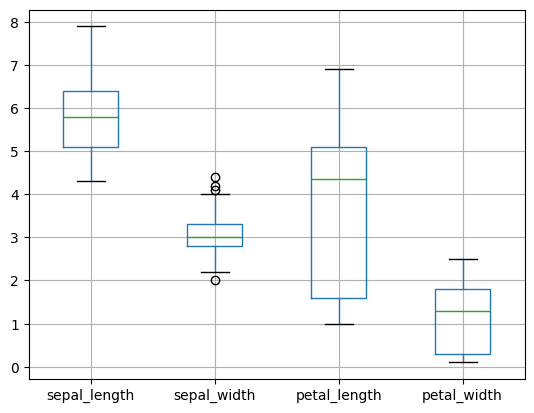

In [7]:
#boxplot

iris.boxplot();

*Quick insights with* `describe()`

Now, the quickest way to get an understanding of your data is the describe function. Simply call this on your data frame to yield a thorough list of descriptive statistics. Many of the calculations we performed above are provided and quartile values show up as well. 

In [37]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


*Relationship between variables*

For more advanced analysis in statistical modeling, it becomes a really important to understand how variables in your data set interact with each other, specifically, how well correlated they are to each other. Correlation simply shows the extent and direction in which two variables are related. You can see pairwise correlations between all your variables with .corr. Our output allows you to see the correlation between any two variables. A positive number demonstrates that as one variable increases, the other tends to as well, while negative shows the opposite. The closer to one or negative one, the stronger the relationship. Note the diagonal is all ones as we're correlating variables with themselves. The usefulness of this output can't be overstated. It's referred to as the correlation matrix and is often a good first step before proceeding to machine learning or statistical modeling. 

In [ ]:
# correlation
df_iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


To make this even easier to interpret, we can create a heat map from this matrix. In pandas, calling style.background_gradient on our correlation matrix yields this snazzy visual. Now with color, it's very clear how strongly and in which direction our variables are correlated. Pandas has really made its reputation as an all around one stop shop for data analysis. And with access to these functions, you can probably see why. In your next project, incorporate these statistical techniques and you'll be well rewarded.

In [ ]:
#correlation matrix
df_iris.corr().style.background_gradient(cmap='RdYlGn', axis=None)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000
